In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
from sklearn.model_selection import train_test_split


label = '/home/master/Jibum/Motion_Show/label'
fi_ls = os.listdir(label)

In [17]:
# labelSet = pd.DataFrame()

# for i in fi_ls:
#     print(i)
#     df = pd.read_csv(label + '/' + i, index_col = 'label')
#     df = df.iloc[:, 4:31]
#     labelSet = pd.concat([labelSet, df])

In [18]:
# csv저장
# labelSet.to_csv('/home/master/Jibum/Motion_Show/result/labelset.csv', index=True,header=True)
test = pd.read_csv('/home/master/Jibum/Motion_Show/result/labelset.csv')
# test = test.rename(index=test['label'])
test

,label,Robot_Hips.X,Robot_Hips.Y,Robot_Hips.Z,Robot_LeftUpLeg.X,Robot_LeftUpLeg.Y,Robot_LeftUpLeg.Z,Robot_LeftLeg.X,Robot_LeftLeg.Y,Robot_LeftLeg.Z,...,Robot_RightUpLeg.Z,Robot_RightLeg.X,Robot_RightLeg.Y,Robot_RightLeg.Z,Robot_RightFoot.X,Robot_RightFoot.Y,Robot_RightFoot.Z,Robot_RightToeBase.X,Robot_RightToeBase.Y,Robot_RightToeBase.Z
0,standing,0.001904,1.111125,0.005761,-0.102821,1.022073,-0.002489,-0.112644,0.565446,-0.015439,...,-0.002493,0.117373,0.567342,-0.015010,0.116155,0.100203,-0.013302,0.117034,0.021351,0.109151
1,standing,0.001800,1.111076,0.005861,-0.102899,1.021990,-0.002360,-0.112545,0.565347,-0.014906,...,-0.002400,0.118023,0.567329,-0.014487,0.117561,0.100190,-0.012330,0.118283,0.021368,0.110143
2,standing,0.001796,1.111071,0.005803,-0.102891,1.021968,-0.002399,-0.112393,0.565320,-0.014832,...,-0.002472,0.118069,0.567337,-0.014446,0.117641,0.100198,-0.012178,0.118328,0.021398,0.110310
3,standing,0.001796,1.111071,0.005803,-0.102891,1.021968,-0.002399,-0.112393,0.565320,-0.014832,...,-0.002472,0.118069,0.567337,-0.014446,0.117641,0.100198,-0.012178,0.118328,0.021398,0.110310
4,standing,0.001780,1.111072,0.005715,-0.102913,1.021971,-0.002420,-0.112356,0.565313,-0.014521,...,-0.002526,0.118026,0.567318,-0.014170,0.117556,0.100181,-0.011581,0.118220,0.021456,0.110955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7454,walking,0.001495,1.103758,0.015666,-0.107431,1.020183,0.004900,-0.110388,0.572050,-0.084210,...,0.013548,0.119717,0.554483,0.003283,0.130742,0.088158,-0.022086,0.149168,-0.002312,0.090559
7455,walking,0.001270,1.103723,0.016382,-0.108011,1.020572,0.005928,-0.109812,0.573154,-0.086736,...,0.014201,0.122615,0.554169,0.004343,0.140890,0.088409,-0.026598,0.159496,-0.004190,0.084273
7456,walking,0.002334,1.103678,0.015983,-0.107066,1.020652,0.005790,-0.108409,0.573981,-0.090419,...,0.013834,0.115149,0.553609,0.009886,0.133269,0.088048,-0.023990,0.150965,-0.005114,0.086557
7457,walking,0.001230,1.103457,0.019422,-0.108350,1.020598,0.009823,-0.110492,0.575134,-0.091816,...,0.017827,0.118377,0.553768,-0.003205,0.128071,0.087958,-0.037130,0.144543,-0.003443,0.075065


In [19]:
test['label'].value_counts()

sit         3974
standing    2507
walking      978
Name: label, dtype: int64

In [20]:
# test = pd.read_csv('/home/master/Jibum/Motion_Show/result/onehotset.csv')
# test = test.rename(index=test['label'])
# test

In [23]:
test.columns

Index(['label', 'Robot_Hips.X', 'Robot_Hips.Y', 'Robot_Hips.Z',
       'Robot_LeftUpLeg.X', 'Robot_LeftUpLeg.Y', 'Robot_LeftUpLeg.Z',
       'Robot_LeftLeg.X', 'Robot_LeftLeg.Y', 'Robot_LeftLeg.Z',
       'Robot_LeftFoot.X', 'Robot_LeftFoot.Y', 'Robot_LeftFoot.Z',
       'Robot_LeftToeBase.X', 'Robot_LeftToeBase.Y', 'Robot_LeftToeBase.Z',
       'Robot_RightUpLeg.X', 'Robot_RightUpLeg.Y', 'Robot_RightUpLeg.Z',
       'Robot_RightLeg.X', 'Robot_RightLeg.Y', 'Robot_RightLeg.Z',
       'Robot_RightFoot.X', 'Robot_RightFoot.Y', 'Robot_RightFoot.Z',
       'Robot_RightToeBase.X', 'Robot_RightToeBase.Y', 'Robot_RightToeBase.Z'],
      dtype='object')

In [5]:
# x = test.drop(['result'], axis=1)
x = test[['Robot_Hips.X', 'Robot_Hips.Y', 'Robot_Hips.Z', 'Robot_LeftUpLeg.X',
       'Robot_LeftUpLeg.Y', 'Robot_LeftUpLeg.Z', 'Robot_LeftLeg.X',
       'Robot_LeftLeg.Y', 'Robot_LeftLeg.Z', 'Robot_LeftFoot.X',
       'Robot_LeftFoot.Y', 'Robot_LeftFoot.Z', 'Robot_LeftToeBase.X',
       'Robot_LeftToeBase.Y', 'Robot_LeftToeBase.Z', 'Robot_RightUpLeg.X',
       'Robot_RightUpLeg.Y', 'Robot_RightUpLeg.Z', 'Robot_RightLeg.X',
       'Robot_RightLeg.Y', 'Robot_RightLeg.Z', 'Robot_RightFoot.X',
       'Robot_RightFoot.Y', 'Robot_RightFoot.Z', 'Robot_RightToeBase.X',
       'Robot_RightToeBase.Y', 'Robot_RightToeBase.Z']]
y = test[['label']]

In [6]:
y

,label
2,2
2,2
2,2
2,2
2,2
...,...
3,3
3,3
3,3
3,3


In [7]:
print(x.shape, y.shape)

(7459, 27) (7459, 1)


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x[:])
print(x)

[[0.41884784 0.98590849 0.85776633 ... 0.5680882  0.33601534 0.53123525]
 [0.4170473  0.98578357 0.85822406 ... 0.57129747 0.33612098 0.53219969]
 [0.4169775  0.98577003 0.8579588  ... 0.57141265 0.33631387 0.53236196]
 ...
 [0.42625761 0.96710366 0.904441   ... 0.65526593 0.16607023 0.50926285]
 [0.40723137 0.96654557 0.92014387 ... 0.63876615 0.17680308 0.49808678]
 [0.41230674 0.9665534  0.92539652 ... 0.61795063 0.18039626 0.50179198]]


In [10]:
# from sklearn.preprocessing import LabelEncoder

# action = ['sit','standing','walking']
# encoder = LabelEncoder()
# encoder.fit(action)
# y_labels = encoder.transform(y)
# print(encoder.classes_)
# print(y_labels)
# for i, label in enumerate(encoder.classes_):
#     print(i, '->', label)
# test_labels=['sit','walking']
# print(test_labels, '->', encoder.transform(test_labels))
# encode_dataset = [0,2,1,2,1,1,0]
# print(encode_dataset,'->', encoder.inverse_transform(encode_dataset))

In [9]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(y)
y_onehot = enc.transform(y).toarray()

In [10]:
y_onehot

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [12]:
x_train_all,x_test,y_train_all,y_test = train_test_split(x,y_onehot, stratify=y_onehot,test_size=0.2, random_state=42)

In [13]:
x_train,x_val,y_train,y_val = train_test_split(x_train_all,y_train_all, stratify=y_train_all,test_size=0.2,random_state=42)

In [14]:
print(x.shape)
print(x_train_all.shape)
print(x_test.shape)
print(x_train.shape)
print(x_val.shape)
print(y_onehot.shape)
print(y_train_all.shape)
print(y_test.shape)
print(y_train.shape)
print(y_val.shape)

(7459, 27)
(5967, 27)
(1492, 27)
(4773, 27)
(1194, 27)
(7459, 3)
(5967, 3)
(1492, 3)
(4773, 3)
(1194, 3)


In [15]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1400      
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
activation_1 (Activation)    (None, 25)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 15)                390       
_________________________________________________________________
activation_2 (Activation)    (None, 15)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 4

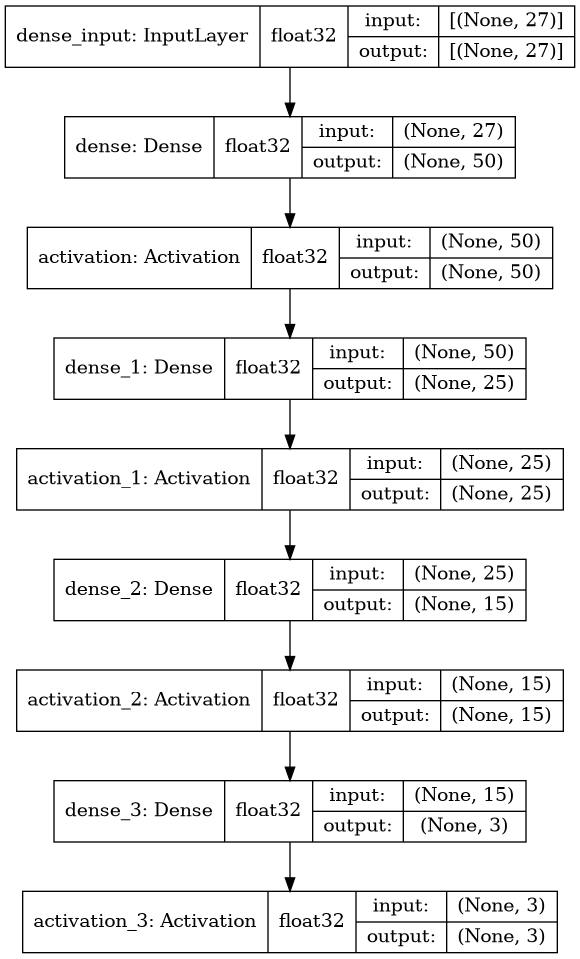

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow as tf


model = Sequential()
model.add(Dense(50, input_shape=(27,)))
model.add(Activation('sigmoid'))
model.add(Dense(25))
model.add(Activation('relu'))
model.add(Dense(15))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

tf.keras.utils.plot_model(model,to_file="modelLogic/model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)


In [17]:
history = model.fit(x_train,y_train, epochs=100, validation_data = (x_val, y_val))

Epoch 1/100
150/150 [==============================] - 1s 4ms/step - loss: 1.0483 - accuracy: 0.4277 - val_loss: 0.9500 - val_accuracy: 0.5327
Epoch 2/100
150/150 [==============================] - 0s 2ms/step - loss: 0.9395 - accuracy: 0.5467 - val_loss: 0.9228 - val_accuracy: 0.5327
Epoch 3/100
150/150 [==============================] - 0s 1ms/step - loss: 0.9102 - accuracy: 0.5379 - val_loss: 0.8663 - val_accuracy: 0.5327
Epoch 4/100
150/150 [==============================] - 0s 1ms/step - loss: 0.8475 - accuracy: 0.5335 - val_loss: 0.7224 - val_accuracy: 0.5938
Epoch 5/100
150/150 [==============================] - 0s 1ms/step - loss: 0.6816 - accuracy: 0.8432 - val_loss: 0.4866 - val_accuracy: 0.8685
Epoch 6/100
150/150 [==============================] - 0s 1ms/step - loss: 0.4487 - accuracy: 0.8682 - val_loss: 0.3575 - val_accuracy: 0.8685
Epoch 7/100
150/150 [==============================] - 0s 1ms/step - loss: 0.3295 - accuracy: 0.8759 - val_loss: 0.3143 - val_accuracy: 0.8685

Text(0, 0.5, 'loss')

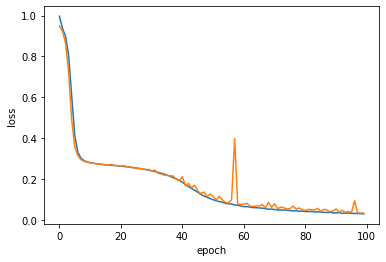

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

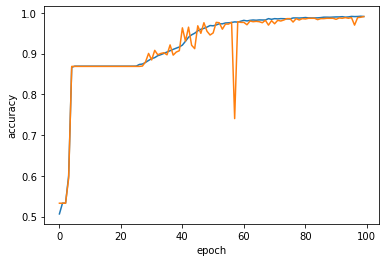

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [20]:
pred = model.predict(x_test)
print(pred)

[[9.9980015e-01 1.9990766e-04 3.8848361e-15]
 [9.9980980e-01 1.9024838e-04 5.1410301e-15]
 [4.9526518e-04 9.9416453e-01 5.3402148e-03]
 ...
 [9.9921167e-01 7.8828313e-04 1.7751199e-13]
 [9.9983096e-01 1.6905222e-04 3.2335695e-15]
 [9.9976712e-01 2.3289147e-04 8.6330470e-15]]


In [21]:
pred.shape

(1492, 3)

In [22]:
pred_label = np.argmax(pred, axis=1)
print(pred_label)

[0 0 1 ... 0 0 0]


In [23]:
pred_label.shape

(1492,)

In [24]:
pred_label[0:9]

array([0, 0, 1, 2, 1, 1, 1, 0, 0])

In [25]:
y_test[0:9]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [26]:
print(model.evaluate(x_train,y_train))

150/150 [==============================] - 0s 933us/step - loss: 0.0265 - accuracy: 0.9925
[0.0265310388058424, 0.9924575686454773]


In [28]:
'''
테스트값이 랜덤으로 들어갔을때
어떤 동작인지 라벨로 출력됬으면 좋겠다.
물론 프레임 단위로 끊기겠지만
리스트 빈도수
코드 재정의 하고 // 라벨링 작업을 코드로 진행하기.(파일명에서 _전까지만 라벨링 해주기)

''' 


'\n테스트값이 랜덤으로 들어갔을때\n어떤 동작인지 라벨로 출력됬으면 좋겠다.\n물론 프레임 단위로 끊기겠지만\n리스트 빈도수\n코드 재정의 하고 // 라벨링 작업을 코드로 진행하기.(파일명에서 _전까지만 라벨링 해주기)\n\n'